In [1]:
#Import Libraries

import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
#Define Path

file_path = Path("Training_Data.csv")
training_df = pd.read_csv(file_path)
training_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
target_data = training_df['TARGET']

In [4]:
#Identify Null Values

training_df.isnull().sum() / len(training_df) * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [5]:
# Identify Duplicates

training_df['SK_ID_CURR'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Name: SK_ID_CURR, Length: 307511, dtype: bool

In [6]:
#Drop Null Values
training_df_2 = training_df.dropna()

In [7]:
#Generate dummie values for descriptive data

training_df_3 = pd.get_dummies(training_df_2,columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'])

In [8]:
#Define X and y variables

X = training_df_3.drop(columns=["TARGET"])

y = training_df_3["TARGET"].values
y = y.reshape(-1, 1)


In [9]:
X.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
71,100083,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,-892,-341.0,...,0,0,0,0,0,0,1,0,1,0
124,100145,1,202500.0,260725.5,16789.5,198000.0,0.018850,-16282,-4375,-762.0,...,0,0,0,0,0,1,0,0,1,0
152,100179,0,202500.0,675000.0,53329.5,675000.0,0.031329,-11375,-2311,-180.0,...,0,0,0,1,0,0,0,0,1,0
161,100190,0,162000.0,263686.5,24781.5,238500.0,0.022625,-13972,-4472,-464.0,...,0,0,0,0,0,1,0,0,1,0
255,100295,1,225000.0,1019205.0,31032.0,774000.0,0.072508,-11356,-602,-335.0,...,0,0,0,0,0,1,0,0,1,0


In [10]:
#Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [11]:
#Scale the data

X_scaler = StandardScaler()

In [12]:
#Fit the data

X_scaler.fit(X_train)

StandardScaler()

In [13]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
number_inputs = 234
number_hidden_nodes = 30

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))
nn.add(Dense(1, activation="sigmoid"))

In [15]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
202/202 [==============================] - 1s 920us/step - loss: 0.4205 - accuracy: 0.8375
Epoch 2/100
202/202 [==============================] - 0s 923us/step - loss: 0.2241 - accuracy: 0.9395
Epoch 3/100
202/202 [==============================] - 0s 971us/step - loss: 0.2018 - accuracy: 0.9402
Epoch 4/100
202/202 [==============================] - 0s 939us/step - loss: 0.1888 - accuracy: 0.9403
Epoch 5/100
202/202 [==============================] - 0s 872us/step - loss: 0.1788 - accuracy: 0.9416
Epoch 6/100
202/202 [==============================] - 0s 847us/step - loss: 0.1709 - accuracy: 0.9426
Epoch 7/100
202/202 [==============================] - 0s 878us/step - loss: 0.1633 - accuracy: 0.9426
Epoch 8/100
202/202 [==============================] - 0s 855us/step - loss: 0.1562 - accuracy: 0.9440
Epoch 9/100
202/202 [==============================] - 0s 894us/step - loss: 0.1492 - accuracy: 0.9478
Epoch 10/100
202/202 [==============================] - 0s 862us/step - l

<AxesSubplot:>

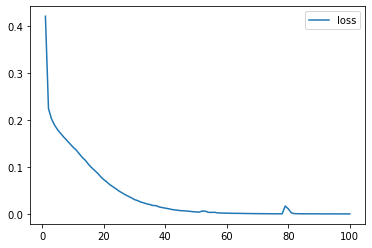

In [17]:
# Create a dataframe with the history dictionary
df_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df_plot.plot(y="loss")

<AxesSubplot:>

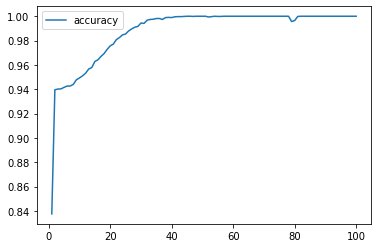

In [18]:
df_plot.plot(y="accuracy")

In [19]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                7050      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 7,081
Trainable params: 7,081
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

68/68 - 0s - loss: 1.0615 - accuracy: 0.9121
Loss: 1.061484932899475, Accuracy: 0.9121338725090027


In [30]:
# Make predictions
predicted = nn.predict(X_test_scaled)

predicted

array([[2.0113253e-14],
       [5.3685425e-09],
       [5.9238672e-03],
       ...,
       [1.1848504e-06],
       [4.1902299e-09],
       [4.1748018e-07]], dtype=float32)